<h1 align="center"> Pobabilistic Graphical Models using pgmpy </h1>

<br/>
<br/>
<br/>
<br/>

<h3 align="center">Ankur Ankan (@ankurankan) </h3>
<h3 align="center">Abinash Panda (@abinashpanda) </h3>

## What are Probabilistic Graphical Models (PGMs)?

Probabilistic Graphical models allow us to represent joint probability distributions in an efficient way and also do operations on it in lesser time complexity. In PGM we exploit the relationship between the random variables to get a compact representation.

##Major types of Graphical Models

* __Bayesian Model__: Bayesian Models are used mainly when we have causal relationship between the variables
* __Markov Model__: When there is a non causal relationship between the variables.

## Bayesian Model

A Bayesian Network consists of a directed graph and a 
conditional probability distribution associated with each of the random variables. A 
Bayesian network is used mostly when there is a causal relationship between the
random variables.

An example of a Bayesian Network representing a student taking some course.


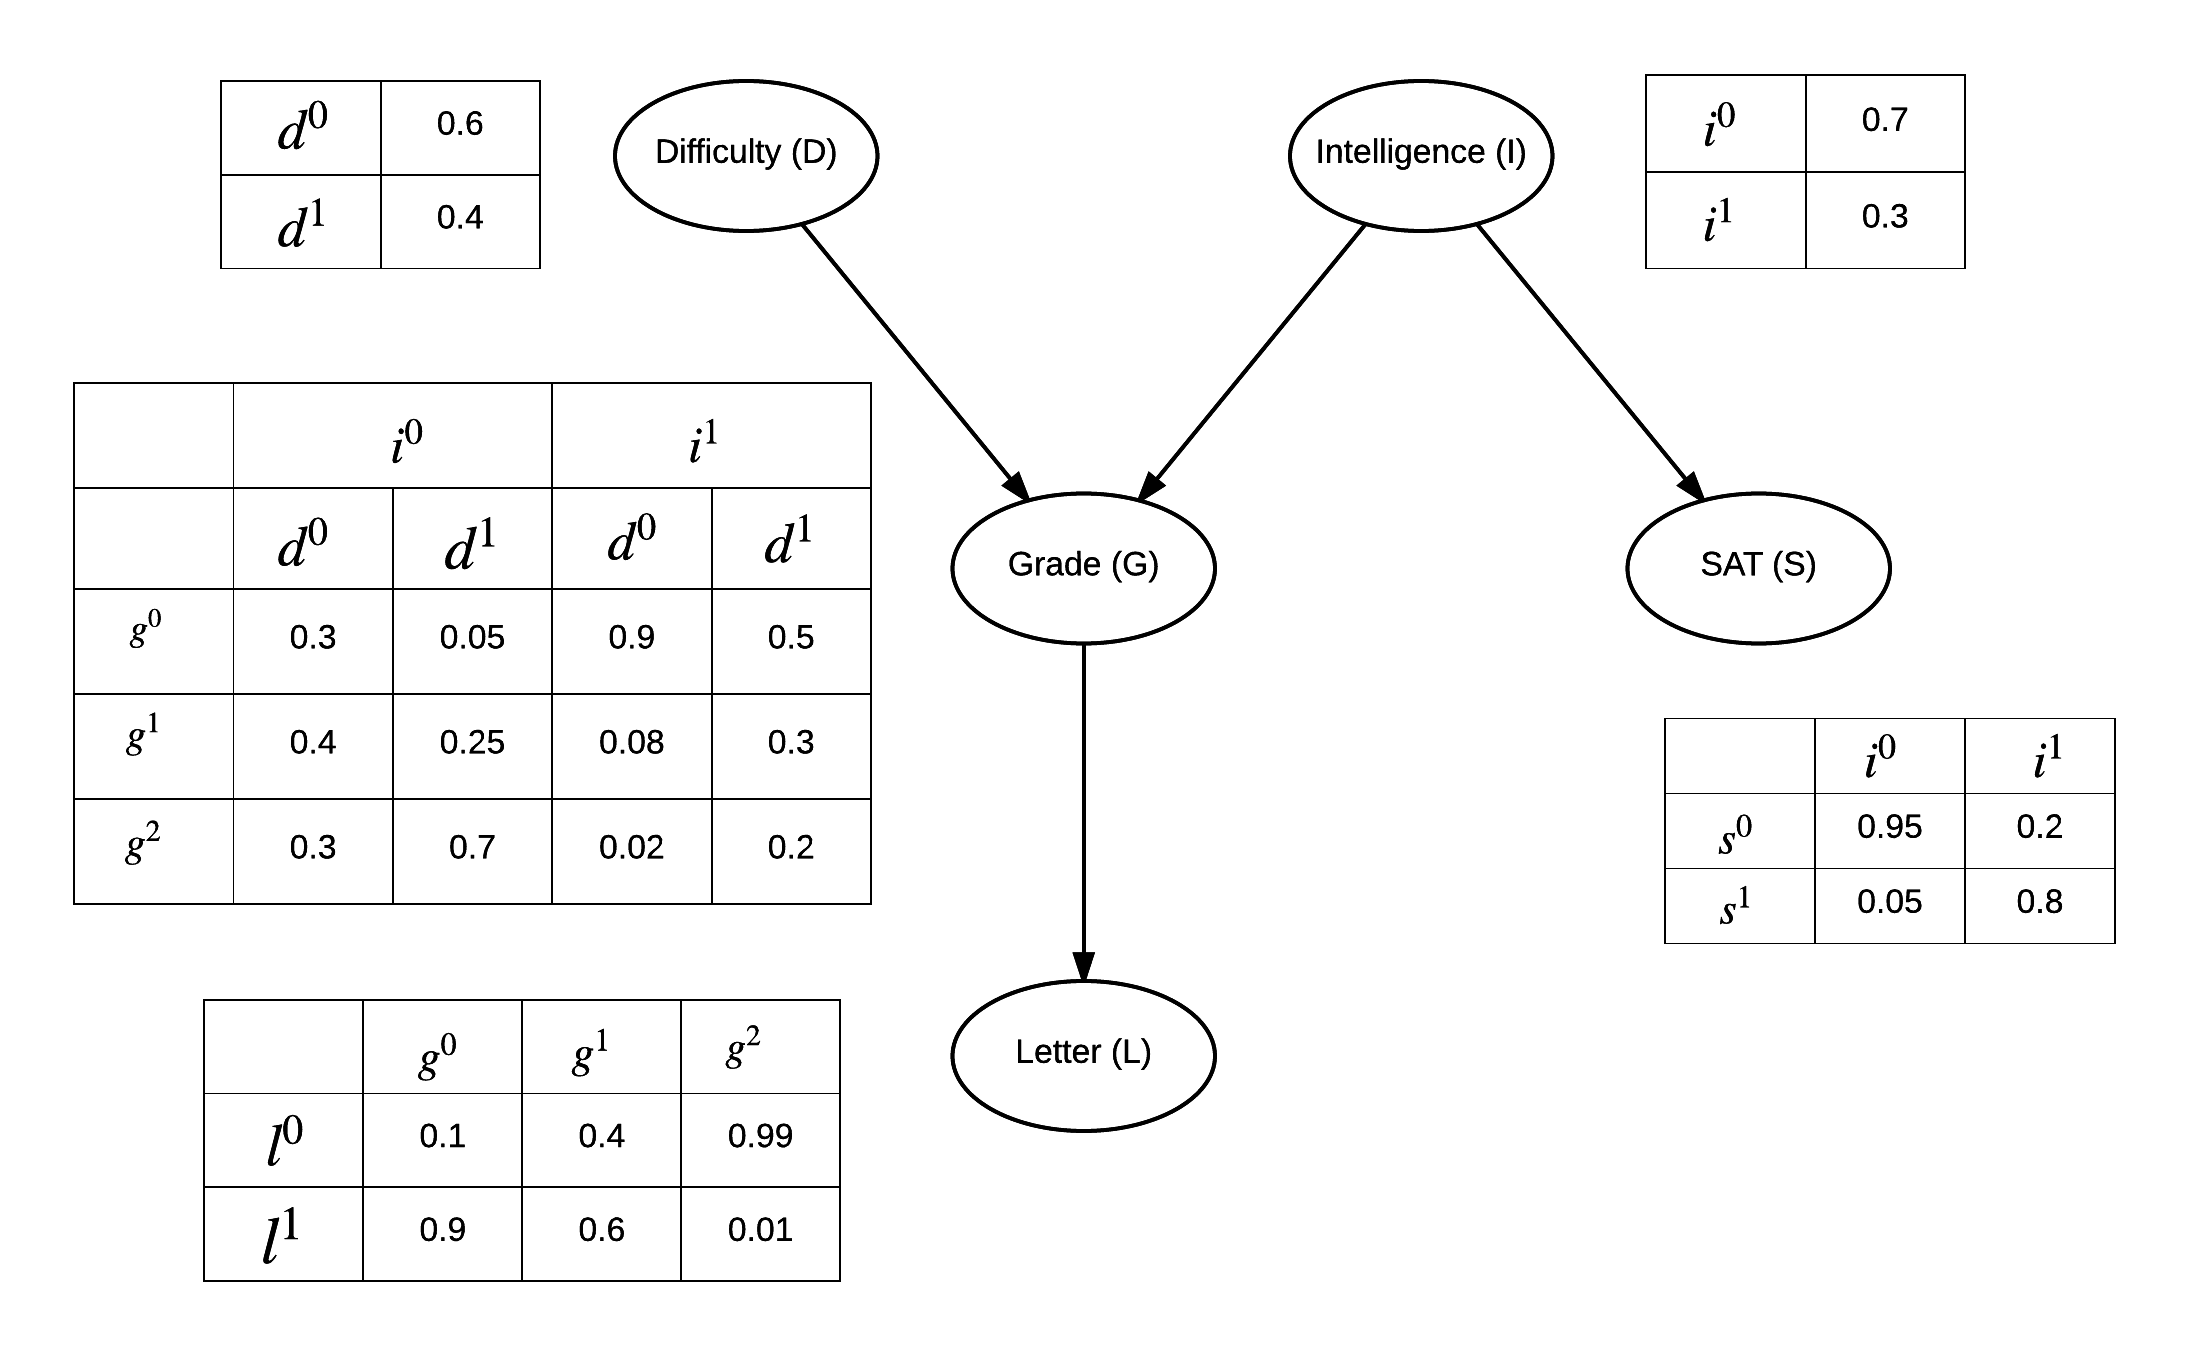

In [2]:
from IPython.display import Image
Image(filename='figure1.png')

##Creating Bayesian Model using pgmpy

In [3]:
from pgmpy.models import BayesianModel
from pgmpy.factors import TabularCPD
   
student_model = BayesianModel([('D', 'G'), ('I', 'G'), 
                               ('G', 'L'), ('I', 'S')])

difficulty_cpd = TabularCPD(variable='D', variable_card=2, 
                            values=[[0.6, 0.4]])
intel_cpd = TabularCPD(variable='I', variable_card=2, 
                       values=[[0.7, 0.3]])
grade_cpd = TabularCPD(variable='G', variable_card=3,
                       values=[[0.3, 0.05, 0.9, 0.5],
                               [0.4, 0.25, 0.08, 0.3],
                               [0.3, 0.7, 0.02, 0.2]],
                       evidence=['I', 'D'], evidence_card=[2, 2])

letter_cpd = TabularCPD(variable='L', variable_card=2,
                        values=[[0.1, 0.4, 0.99],
                                [0.9, 0.6, 0.01]],
                        evidence=['G'], evidence_card=[3])
sat_cpd = TabularCPD(variable='S', variable_card=2,
                     values=[[0.95, 0.2],
                             [0.05, 0.8]],
                     evidence=['I'], evidence_card=[2])
   
student_model.add_cpds(grade_cpd, difficulty_cpd, 
                       intel_cpd, letter_cpd, sat_cpd)

In [4]:
student_model.nodes()

['D', 'G', 'I', 'S', 'L']

In [5]:
student_model.edges()

[('D', 'G'), ('G', 'L'), ('I', 'G'), ('I', 'S')]

In [6]:
student_model.get_cpds()

[<TabularCPD representing P(G:3 | I:2, D:2) at 0x7f91bc09cda0>,
 <TabularCPD representing P(D:2) at 0x7f91bc09ce10>,
 <TabularCPD representing P(I:2) at 0x7f91bc09cdd8>,
 <TabularCPD representing P(L:2 | G:3) at 0x7f91bc09ce80>,
 <TabularCPD representing P(S:2 | I:2) at 0x7f91bc09ceb8>]

In [7]:
print(student_model.get_cpds('L'))

╒══════════╤════════════╤════════════╤════════════╕
│ G        │ ['G', '0'] │ ['G', '1'] │ ['G', '2'] │
├──────────┼────────────┼────────────┼────────────┤
│ ['L', 0] │ 0.1        │ 0.4        │ 0.99       │
├──────────┼────────────┼────────────┼────────────┤
│ ['L', 1] │ 0.9        │ 0.6        │ 0.01       │
╘══════════╧════════════╧════════════╧════════════╛


## Independencies in Bayesian Model

In [8]:
student_model.local_independencies('G')

(G _|_ S | D, I)

###Active Trail

Two nodes in a Bayesian Network are called to be on an active trail if change in one of the variables affects the other. An active trail is formed if the trail between the variables only have causal, evidential or common cause relations and if a common evidence relation is present then the common evidence is observed. The common evidence relation is also commonly known as V structure.

In [9]:
student_model.active_trail_nodes('D', observed='G')

{'D', 'I', 'S'}

##Parameter Learning

Creating model from raw data. pgmpy gives a direct method for computing the parameters of a Bayesian Network using fit method.

In [10]:
import numpy as np
import pandas as pd

# Generate raw_data assuming all the variables have only 2 states.
raw_data = np.random.randint(low=0, high=2, size=(1000, 5))
data = pd.DataFrame(raw_data, columns=['D', 'I', 'G', 'S', 'L'])

train_data = data[:750]

student_model = BayesianModel([('D', 'G'), ('I', 'G'), 
                               ('G', 'L'), ('I', 'S')])
student_model.fit(train_data)
student_model.get_cpds()

[<TabularCPD representing P(D:2) at 0x7f91bc09c7f0>,
 <TabularCPD representing P(G:2 | D:2, I:2) at 0x7f91bc09c940>,
 <TabularCPD representing P(I:2) at 0x7f91bc09c8d0>,
 <TabularCPD representing P(S:2 | I:2) at 0x7f91bc09c0b8>,
 <TabularCPD representing P(L:2 | G:2) at 0x7f91bc09cb38>]

In [11]:
print(student_model.get_cpds('L'))

╒══════════╤════════════════════╤═════════════════════╕
│ G        │ ['G', '0']         │ ['G', '1']          │
├──────────┼────────────────────┼─────────────────────┤
│ ['L', 0] │ 0.4835164835164835 │ 0.5647668393782384  │
├──────────┼────────────────────┼─────────────────────┤
│ ['L', 1] │ 0.5164835164835165 │ 0.43523316062176165 │
╘══════════╧════════════════════╧═════════════════════╛


##Inference

Inference lets us query over these networks to predict values on new data.

In [12]:
from pgmpy.inference import VariableElimination

model_infer = VariableElimination(student_model)

# Inference without any prior observation
results = model_infer.query('D')
print(results['D'])

╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.5280 │
├─────┼──────────┤
│ D_1 │   0.4720 │
╘═════╧══════════╛


In [13]:
# Inference with given observation
results = model_infer.query('D', evidence={'I': 0, 'G': 0, 'L': 1, 'S': 1})
print(results['D'])

╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.5420 │
├─────┼──────────┤
│ D_1 │   0.4580 │
╘═════╧══════════╛


Inference class also supports MAP queries.

In [14]:
# MAP inference without any observation
model_infer.map_query('D')

{'D': 0}

In [15]:
# MAP inference with given observation such as
# state 0 is observed of random variable I and so on
model_infer.map_query('D', evidence={'I': 0, 'G': 0, 'L': 1, 'S': 1})

{'D': 0}

Else we can directly use the predict method in model class instead of creating an inference class object.

In [16]:
test_data = data[750:]
test_data = test_data.drop('G', axis=1)
results = student_model.predict(test_data)

results.head()

,G
750,0
751,1
752,1
753,0
754,1


We can also perform inference using junction tree belief propagation algorithm.

In [17]:
from pgmpy.inference import BeliefPropagation

model_infer_belief_propagation = BeliefPropagation(student_model)
model_infer_belief_propagation.query('G')

{'G': <Factor representing phi(G:2) at 0x7f91b76b6f98>}

##Extending pgmpy

pgmpy has been built in such a way that we can easily add new algorithms to it.

In [23]:
from pgmpy.inference import Inference

class MyInferenceAlgo(Inference):
    """"
    This algorithm randomly selects a factor which has the query variable in its scope and marginalizes 
    the other variables in the scope to return a factor containing only the query variable.
    """
    def query(self, variable, evidence=None):
        phi = np.random.choice(self.factors[variable])
        phi_marginalized = phi.marginalize(list(set(phi.scope()) - {variable}), inplace=False)
        phi_normalized = phi_marginalized.normalize(inplace=False)
        return {variable: phi_normalized}

student_infer = MyInferenceAlgo(student_model)
result = student_infer.query('G')
print(result['G'])

╒═════╤══════════╕
│ G   │   phi(G) │
╞═════╪══════════╡
│ G_0 │   0.4858 │
├─────┼──────────┤
│ G_1 │   0.5142 │
╘═════╧══════════╛


## Reading from standard file formats in pgmpy

Currently ```pmgpy``` supports reading and writing from following file formats

* XMLBIF
* XMLBeliefNetwork
* PomdpX
* UAI
* ProbModelXML

In [19]:
!head -n 20 test_BIF.xml

<BIF VERSION="0.3">
<NETWORK>
<NAME>Dog-Problem</NAME>

<VARIABLE TYPE="nature">
	<NAME>light-on</NAME>
	<OUTCOME>true</OUTCOME>
	<OUTCOME>false</OUTCOME>
	<PROPERTY>position = (73, 165)</PROPERTY>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>bowel-problem</NAME>
	<OUTCOME>true</OUTCOME>
	<OUTCOME>false</OUTCOME>
	<PROPERTY>position = (190, 69)</PROPERTY>
</VARIABLE>

<VARIABLE TYPE="nature">
	<NAME>dog-out</NAME>


In [20]:
from pgmpy.readwrite import XMLBIFReader
reader = XMLBIFReader('test_BIF.xml')
model = reader.get_model()

In [21]:
model.nodes()

['bowel-problem', 'family-out', 'hear-bark', 'dog-out', 'light-on']

In [22]:
model.get_cpds()

[<TabularCPD representing P(bowel-problem:2) at 0x7f91b76d6940>,
 <TabularCPD representing P(family-out:2) at 0x7f91b76d69e8>,
 <TabularCPD representing P(hear-bark:2 | dog-out:2) at 0x7f91b76d6908>,
 <TabularCPD representing P(dog-out:2 | family-out:2, bowel-problem:2) at 0x7f91b76d6a90>,
 <TabularCPD representing P(light-on:2 | family-out:2) at 0x7f91b76dc3c8>]

## Features to Come
* Structure Learning
* Dynamic Bayesian Networks
* Sampling Algorithms
* Approximate Inference Algorithms